# Dedalus tutorial 1
#### Coordinate, Distributers and Bases

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

###### Defineing a coordinate system
1D "CoordinateSystem"\
3D any dimensions "CartesianCoordinates"\
3D Azimuth and radius "PolarCoordinates"\
3D azimuth and colatitude "S2Coordinates"\
3D azimuth, colatitude and radius "SphericalCoordinates"

In [3]:
coords = d3.CartesianCoordinates('x', 'y', 'z')

In [4]:
dist = d3.Distributor(coords, dtype=np.float64) # No mesh for serial / automatic parallelization

In [5]:
for layout in dist.layouts:
    print('Layout {}:  Grid space: {}  Local: {}'.format(layout.index, layout.grid_space, layout.local))

Layout 0:  Grid space: [False False False]  Local: [ True  True  True]
Layout 1:  Grid space: [False False  True]  Local: [ True  True  True]
Layout 2:  Grid space: [False  True  True]  Local: [ True  True  True]
Layout 3:  Grid space: [ True  True  True]  Local: [ True  True  True]


In [6]:
xbasis = d3.RealFourier(coords['x'], size=32, bounds=(0,1), dealias=3/2)
ybasis = d3.RealFourier(coords['y'], size=32, bounds=(0,1), dealias=3/2)
zbasis = d3.Chebyshev(coords['z'], size=32, bounds=(0,1), dealias=3/2)

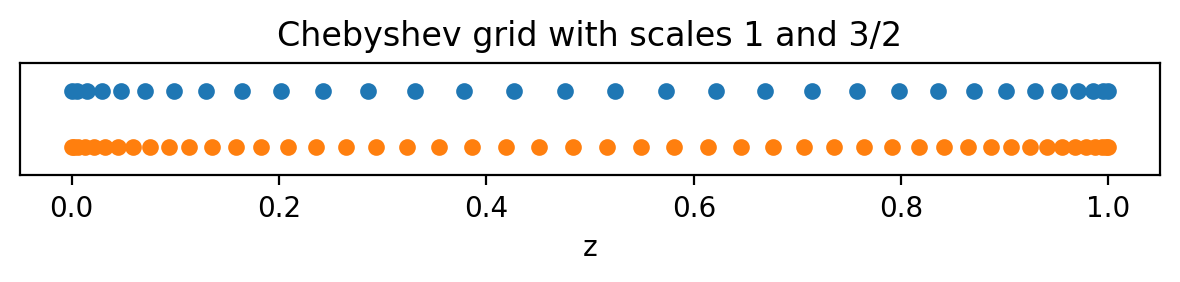

In [7]:
grid_normal = zbasis.global_grid(dist, scale=1).ravel()
grid_dealias = zbasis.global_grid(dist, scale=3/2).ravel()

plt.figure(figsize=(6, 1.5), dpi=100)
plt.plot(grid_normal, 0*grid_normal+1, 'o', markersize=5)
plt.plot(grid_dealias, 0*grid_dealias-1, 'o', markersize=5)
plt.xlabel('z')
plt.title('Chebyshev grid with scales 1 and 3/2')
plt.ylim([-2, 2])
plt.gca().yaxis.set_ticks([]);
plt.tight_layout()

In [8]:
local_x = dist.local_grid(xbasis)
local_y = dist.local_grid(ybasis)
local_z = dist.local_grid(zbasis)
print('Local x shape:', local_x.shape)
print('Local y shape:', local_y.shape)
print('Local z shape:', local_z.shape)

Local x shape: (32, 1, 1)
Local y shape: (1, 32, 1)
Local z shape: (1, 1, 32)


In [9]:
local_kx = dist.local_modes(xbasis)
local_ky = dist.local_modes(ybasis)
local_nz = dist.local_modes(zbasis)
print('Local kx shape:', local_kx.shape)
print('Local ky shape:', local_ky.shape)
print('Local nz shape:', local_nz.shape)

Local kx shape: (32, 1, 1)
Local ky shape: (1, 32, 1)
Local nz shape: (1, 1, 32)
